<h2><b>Data 690: NLP Homework 3</b></h2>
<h3><b> Submitted By: Srashti Soni</b></h3>


<h3>Exercise 1</h3>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/train.tsv', sep='\t')

data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
#Count the number of expressed sentiments by category
Sentiment_count=data.groupby('Sentiment').count()
Sentiment_count

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27273
2,79582,79582,79582
3,32927,32927,32927
4,9206,9206,9206


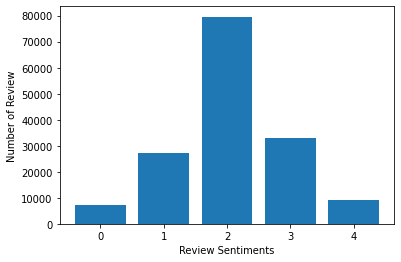

In [ ]:
#Provide a histogram of sentiments by category
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])

plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')

plt.show()

In [ ]:
# Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize and remove symbols and numbers
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer


token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts= cv.fit_transform(data['Phrase'])

In [ ]:
# Split dataset (the test dataset represents 30% of the total data).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [ ]:
# Import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function. Compute the model accuracy.
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


In [ ]:
#TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So, the words must be a signature word. Use TfidfVectorizer() for 'Phrase'.
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()

text_tf= tf.fit_transform(data['Phrase'])

In [ ]:
# Split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [ ]:
# Building the Text Classification Model using TF-IDF. Firstly, importing the MultinomialNB module and creating the Multinomial Naive Bayes classifier object using MultinomialNB() function.
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


<h3> Exercise 2</h3>

###Sentiment by AWS comprehend

{"File": "digital_press_sentiment.txt", "Line": 0, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.03750487044453621, "Negative": 0.45717084407806396, "Neutral": 0.4963161051273346, "Positive": 0.009008055552840233}}<br>
{"File": "digital_press_sentiment.txt", "Line": 1, "Sentiment": "POSITIVE", "SentimentScore": {"Mixed": 0.043566156178712845, "Negative": 0.03873129561543465, "Neutral": 0.40551385283470154, "Positive": 0.5121886730194092}}<br>
{"File": "digital_press_sentiment.txt", "Line": 2, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.01050309557467699, "Negative": 0.13323000073432922, "Neutral": 0.8370556831359863, "Positive": 0.019211260601878166}}<br>
{"File": "digital_press_sentiment.txt", "Line": 3, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.007208747789263725, "Negative": 0.04181428998708725, "Neutral": 0.92505943775177, "Positive": 0.025917595252394676}}<br>
{"File": "digital_press_sentiment.txt", "Line": 4, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.0028448267839848995, "Negative": 0.23049569129943848, "Neutral": 0.7550657391548157, "Positive": 0.011593766510486603}}<br>
{"File": "digital_press_sentiment.txt", "Line": 5, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.009337893687188625, "Negative": 0.4201979637145996, "Neutral": 0.5601200461387634, "Positive": 0.010344035923480988}}


**In the above analysis we can see that the Sentiment measure is done line by line and in most of the cases the sentiment is "NEUTRAL"**

###Entities

{"Entities": [{"BeginOffset": 4, "EndOffset": 18, "Score": 0.7068233365613917, "Text": "United Kingdom", "Type": "ORGANIZATION"}, {"BeginOffset": 28, "EndOffset": 31, "Score": 0.9786273835246497, "Text": "one", "Type": "QUANTITY"}, {"BeginOffset": 39, "EndOffset": 55, "Score": 0.6154102640749735, "Text": "worst recessions", "Type": "QUANTITY"}, {"BeginOffset": 78, "EndOffset": 87, "Score": 0.9982999912078382, "Text": "last year", "Type": "DATE"}, {"BeginOffset": 89, "EndOffset": 96, "Score": 0.8839851444595728, "Text": "Germany", "Type": "ORGANIZATION"}, {"BeginOffset": 133, "EndOffset": 141, "Score": 0.9706624988508165, "Text": "pandemic", "Type": "EVENT"}, {"BeginOffset": 165, "EndOffset": 188, "Score": 0.8739415544220246, "Text": "global financial crisis", "Type": "EVENT"}, {"BeginOffset": 220, "EndOffset": 226, "Score": 0.8974571235160999, "Text": "Europe", "Type": "ORGANIZATION"}, {"BeginOffset": 259, "EndOffset": 261, "Score": 0.9961087927707357, "Text": "5%", "Type": "QUANTITY"}, {"BeginOffset": 262, "EndOffset": 271, "Score": 0.9954193088114317, "Text": "last year", "Type": "DATE"}, {"BeginOffset": 273, "EndOffset": 275, "Score": 0.9903052035025196, "Text": "EU", "Type": "ORGANIZATION"}, {"BeginOffset": 319, "EndOffset": 323, "Score": 0.998907478494082, "Text": "6.4%", "Type": "QUANTITY"}, {"BeginOffset": 338, "EndOffset": 346, "Score": 0.998289654419616, "Text": "Eurostat", "Type": "ORGANIZATION"}], "File": "digital_press_sentiment.txt", "Line": 0}
{"Entities": [{"BeginOffset": 4, "EndOffset": 17, "Score": 0.9489941060668154, "Text": "United States", "Type": "ORGANIZATION"}, {"BeginOffset": 56, "EndOffset": 59, "Score": 0.832075142938795, "Text": "GDP", "Type": "OTHER"}, {"BeginOffset": 74, "EndOffset": 78, "Score": 0.9985064641358451, "Text": "3.5%", "Type": "QUANTITY"}, {"BeginOffset": 88, "EndOffset": 98, "Score": 0.8452196575740594, "Text": "prior year", "Type": "DATE"}], "File": "digital_press_sentiment.txt", "Line": 1}
{"Entities": [{"BeginOffset": 1, "EndOffset": 6, "Score": 0.9801134800752463, "Text": "Today", "Type": "DATE"}, {"BeginOffset": 90, "EndOffset": 98, "Score": 0.6537684914029626, "Text": "pandemic", "Type": "EVENT"}, {"BeginOffset": 152, "EndOffset": 154, "Score": 0.929395952869375, "Text": "UK", "Type": "ORGANIZATION"}, {"BeginOffset": 155, "EndOffset": 171, "Score": 0.9279799161895936, "Text": "finance minister", "Type": "PERSON"}, {"BeginOffset": 172, "EndOffset": 183, "Score": 0.9970079770171625, "Text": "Rishi Sunak", "Type": "PERSON"}, {"BeginOffset": 222, "EndOffset": 241, "Score": 0.6458326841289342, "Text": "some positive signs", "Type": "QUANTITY"}, {"BeginOffset": 363, "EndOffset": 374, "Score": 0.8545631252772576, "Text": "many people", "Type": "QUANTITY"}], "File": "digital_press_sentiment.txt", "Line": 2}
{"Entities": [{"BeginOffset": 33, "EndOffset": 47, "Score": 0.9990364874624014, "Text": "United Kingdom", "Type": "LOCATION"}, {"BeginOffset": 60, "EndOffset": 69, "Score": 0.9993896102941885, "Text": "January 5", "Type": "DATE"}, {"BeginOffset": 114, "EndOffset": 135, "Score": 0.9932706818298713, "Text": "first quarter of 2021", "Type": "DATE"}, {"BeginOffset": 175, "EndOffset": 197, "Score": 0.9903546529315606, "Text": "fourth quarter of 2020", "Type": "DATE"}], "File": "digital_press_sentiment.txt", "Line": 3}
{"Entities": [{"BeginOffset": 17, "EndOffset": 27, "Score": 0.8721445998672165, "Text": "double dip", "Type": "QUANTITY"}, {"BeginOffset": 90, "EndOffset": 99, "Score": 0.9996725408372323, "Text": "Sam Miley", "Type": "PERSON"}, {"BeginOffset": 121, "EndOffset": 127, "Score": 0.9876439254421928, "Text": "London", "Type": "LOCATION"}, {"BeginOffset": 134, "EndOffset": 176, "Score": 0.9823558391291516, "Text": "Centre for Economics and Business Research", "Type": "ORGANIZATION"}, {"BeginOffset": 195, "EndOffset": 201, "Score": 0.9992315717856975, "Text": "Friday", "Type": "DATE"}], "File": "digital_press_sentiment.txt", "Line": 4}
{"Entities": [{"BeginOffset": 14, "EndOffset": 16, "Score": 0.6623356453836039, "Text": "EU", "Type": "ORGANIZATION"}, {"BeginOffset": 17, "EndOffset": 19, "Score": 0.5336123960639858, "Text": "UK", "Type": "LOCATION"}, {"BeginOffset": 51, "EndOffset": 57, "Score": 0.9829043522916916, "Text": "Brexit", "Type": "EVENT"}, {"BeginOffset": 79, "EndOffset": 90, "Score": 0.9986682567473393, "Text": "December 31", "Type": "DATE"}], "File": "digital_press_sentiment.txt", "Line": 5}

###Key Phrases

{"File": "digital_press_sentiment.txt", "KeyPhrases": [{"BeginOffset": 0, "EndOffset": 18, "Score": 0.9999681721834227, "Text": "The United Kingdom"}, {"BeginOffset": 35, "EndOffset": 55, "Score": 0.9999301883479208, "Text": "the worst recessions"}, {"BeginOffset": 62, "EndOffset": 77, "Score": 0.9999659670036328, "Text": "major economies"}, {"BeginOffset": 78, "EndOffset": 87, "Score": 0.9998839038547481, "Text": "last year"}, {"BeginOffset": 89, "EndOffset": 96, "Score": 0.9999004701515762, "Text": "Germany"}, {"BeginOffset": 129, "EndOffset": 141, "Score": 0.9952163653200685, "Text": "the pandemic"}, {"BeginOffset": 161, "EndOffset": 188, "Score": 0.9999713907209103, "Text": "the global financial crisis"}, {"BeginOffset": 190, "EndOffset": 211, "Score": 0.9999144151507269, "Text": "Provisional estimates"}, {"BeginOffset": 220, "EndOffset": 226, "Score": 0.9999849798550975, "Text": "Europe"}, {"BeginOffset": 229, "EndOffset": 244, "Score": 0.9998587986477093, "Text": "biggest economy"}, {"BeginOffset": 259, "EndOffset": 261, "Score": 0.9990471289669283, "Text": "5%"}, {"BeginOffset": 262, "EndOffset": 271, "Score": 0.9985668708186576, "Text": "last year"}, {"BeginOffset": 273, "EndOffset": 279, "Score": 0.9982983207872791, "Text": "EU GDP"}, {"BeginOffset": 319, "EndOffset": 323, "Score": 0.9989779502235917, "Text": "6.4%"}, {"BeginOffset": 338, "EndOffset": 346, "Score": 0.9997746260416305, "Text": "Eurostat"}, {"BeginOffset": 348, "EndOffset": 365, "Score": 0.999945802756167, "Text": "The United States"}, {"BeginOffset": 387, "EndOffset": 397, "Score": 0.9997012315965431, "Text": "comparison"}, {"BeginOffset": 404, "EndOffset": 407, "Score": 0.9949432130288633, "Text": "GDP"}, {"BeginOffset": 422, "EndOffset": 426, "Score": 0.9989802532717331, "Text": "3.5%"}, {"BeginOffset": 432, "EndOffset": 446, "Score": 0.999910364345219, "Text": "the prior year"}, {"BeginOffset": 449, "EndOffset": 454, "Score": 0.9998976097084851, "Text": "Today"}, {"BeginOffset": 457, "EndOffset": 464, "Score": 0.9993313627166063, "Text": "figures"}, {"BeginOffset": 475, "EndOffset": 486, "Score": 0.9999848010538692, "Text": "the economy"}, {"BeginOffset": 503, "EndOffset": 518, "Score": 0.9999518022266825, "Text": "a serious shock"}, {"BeginOffset": 522, "EndOffset": 530, "Score": 0.9999697814091877, "Text": "a result"}, {"BeginOffset": 534, "EndOffset": 546, "Score": 0.9997154141935128, "Text": "the pandemic"}, {"BeginOffset": 571, "EndOffset": 580, "Score": 0.9999854566779314, "Text": "countries"}, {"BeginOffset": 588, "EndOffset": 597, "Score": 0.9998963591802439, "Text": "the world"}, {"BeginOffset": 600, "EndOffset": 631, "Score": 0.9994580566441733, "Text": "UK finance minister Rishi Sunak"}, {"BeginOffset": 640, "EndOffset": 651, "Score": 0.9999671590694009, "Text": "a statement"}, {"BeginOffset": 670, "EndOffset": 689, "Score": 0.9992512631568444, "Text": "some positive signs"}, {"BeginOffset": 693, "EndOffset": 704, "Score": 0.9999903441471425, "Text": "the economy"}, {"BeginOffset": 707, "EndOffset": 717, "Score": 0.9997603360010346, "Text": "resilience"}, {"BeginOffset": 723, "EndOffset": 733, "Score": 0.9999822381600467, "Text": "the winter"}, {"BeginOffset": 748, "EndOffset": 768, "Score": 0.9999856553719141, "Text": "the current lockdown"}, {"BeginOffset": 787, "EndOffset": 807, "Score": 0.9999622122483657, "Text": "a significant impact"}, {"BeginOffset": 811, "EndOffset": 837, "Score": 0.998653193389834, "Text": "many people and businesses"}, {"BeginOffset": 840, "EndOffset": 865, "Score": 0.9999703476197646, "Text": "The new national lockdown"}, {"BeginOffset": 869, "EndOffset": 887, "Score": 0.9999322143238284, "Text": "the United Kingdom"}, {"BeginOffset": 900, "EndOffset": 909, "Score": 0.9999294344621695, "Text": "January 5"}, {"BeginOffset": 930, "EndOffset": 941, "Score": 0.9999751454894208, "Text": "the economy"}, {"BeginOffset": 950, "EndOffset": 967, "Score": 0.9999785031453823, "Text": "the first quarter"}, {"BeginOffset": 971, "EndOffset": 975, "Score": 0.9999848606494245, "Text": "2021"}, {"BeginOffset": 987, "EndOffset": 997, "Score": 0.9998847984212187, "Text": "the return"}, {"BeginOffset": 1001, "EndOffset": 1007, "Score": 0.9997868992150214, "Text": "growth"}, {"BeginOffset": 1011, "EndOffset": 1029, "Score": 0.999982556025578, "Text": "the fourth quarter"}, {"BeginOffset": 1033, "EndOffset": 1037, "Score": 0.9999821189265068, "Text": "2020"}, {"BeginOffset": 1054, "EndOffset": 1078, "Score": 0.9758342656092862, "Text": "a double dip [recession]"}, {"BeginOffset": 1129, "EndOffset": 1138, "Score": 0.9997133392721248, "Text": "Sam Miley"}, {"BeginOffset": 1140, "EndOffset": 1152, "Score": 0.9997967319121407, "Text": "an economist"}, {"BeginOffset": 1156, "EndOffset": 1179, "Score": 0.999917231188744, "Text": "the London-based Centre"}, {"BeginOffset": 1184, "EndOffset": 1215, "Score": 0.9729814484634576, "Text": "Economics and Business Research"}, {"BeginOffset": 1224, "EndOffset": 1230, "Score": 0.9999707946753223, "Text": "a note"}, {"BeginOffset": 1234, "EndOffset": 1240, "Score": 0.9999300290398373, "Text": "Friday"}, {"BeginOffset": 1242, "EndOffset": 1252, "Score": 0.9916997858275206, "Text": "Disruption"}, {"BeginOffset": 1256, "EndOffset": 1267, "Score": 0.9942981100886807, "Text": "EU-UK trade"}, {"BeginOffset": 1278, "EndOffset": 1285, "Score": 0.9999691257472011, "Text": "the end"}, {"BeginOffset": 1289, "EndOffset": 1317, "Score": 0.9997841011908755, "Text": "the Brexit transition period"}, {"BeginOffset": 1321, "EndOffset": 1332, "Score": 0.9995795121141022, "Text": "December 31"}, {"BeginOffset": 1353, "EndOffset": 1361, "Score": 0.9999799732399826, "Text": "activity"}]}

###Exercise-3

###IBM Cloud Sentiment analysis

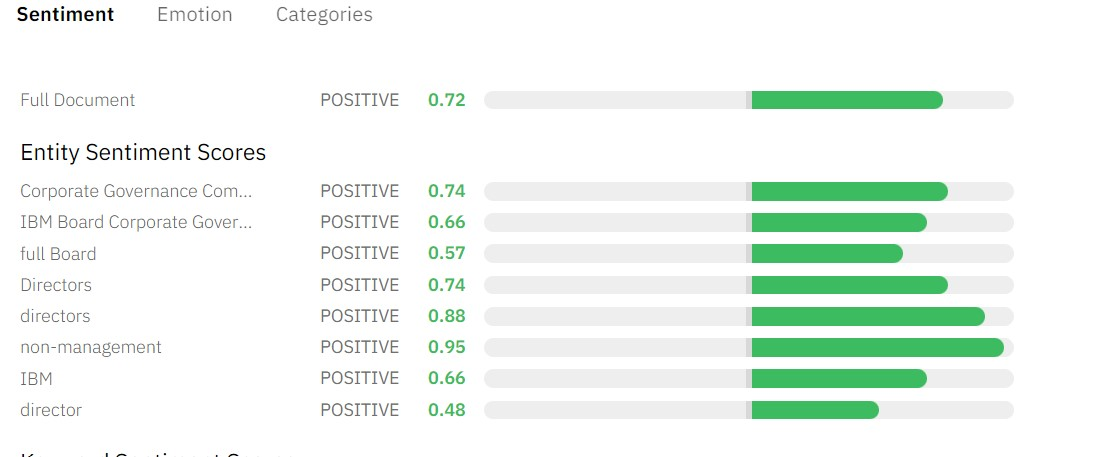


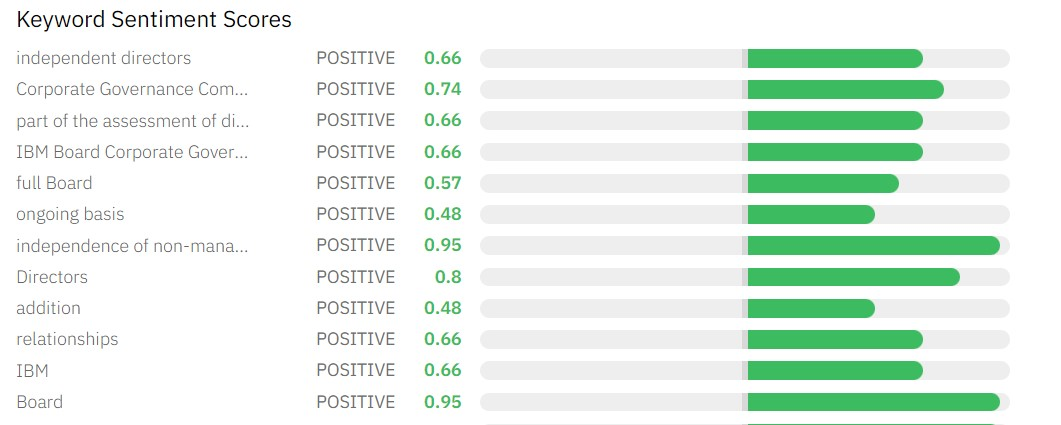


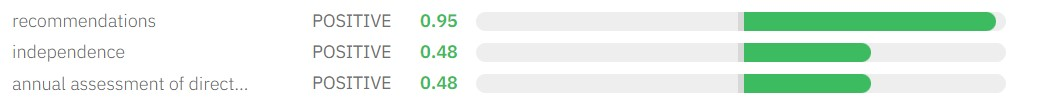

###Is there any difference in the results? What is IBM’s philosophy in sentiment analysis?

AWS tends to give a line by line evaluation of the entire text document where as the IBM watson sentiment analysis will evaluate the entire document and then give the overall sentiment of the document. Moreover, There is a significant difference between both the sentiment analysis as the AWS sentiment analysis gives out a Neutral sentiment and the IBM gives out a overall positive sentiment. 